In [110]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

In [111]:
data = pd.read_csv("Salaries.csv")
data.head()

,company,job,degree,salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


rename salary_more_than_100k to expectedsalary

In [112]:
data.rename(columns={"salary_more_than_100k":"expectedsalary"},inplace=True)

In [113]:
data

,company,job,degree,expectedsalary
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


separate dependent and indepenent variables

In [114]:
X=data.loc[:,data.columns!='expectedsalary']
X

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [115]:
y=data["expectedsalary"]


In [116]:
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: expectedsalary, dtype: int64

ML also works with number. So need to convert the label to number using labelencoder

In [117]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X["company"]=le.fit_transform(X["company"])
X["job"]=le.fit_transform(X["job"])
X["degree"]=le.fit_transform(X["degree"])


E:\AnacondaInstall\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\AnacondaInstall\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\AnacondaInstall\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [118]:
X

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


Splitting X and y into training and test datasets.

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [120]:
print(X_train.shape)
print(y_train.shape)

(12, 3)
(12,)


In [121]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

Install GraphViz

Download graphviz from the following link-graphviz-2.38.msi

Now copy the path of your graphviz file

Mine path is "C:\Program Files (x86)\graphviz\release\bin" 

Control Panel > System and Security > System > Advanced System Settings > Environment Variables > Path > Add (copy you path here)

Restart your system( Much needed step) 

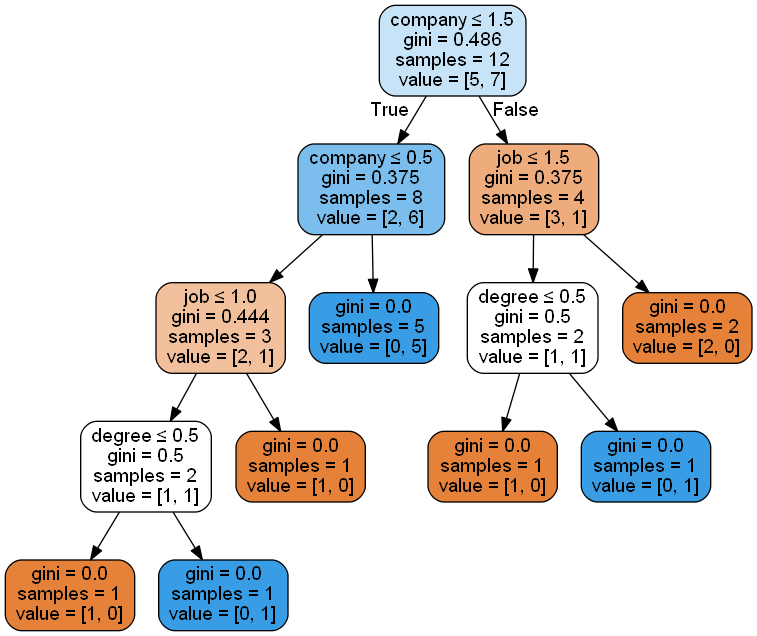

In [122]:
import pydotplus
from IPython.display import Image
from sklearn import tree

dot_tree = tree.export_graphviz(model, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)  

Image(graph.create_png())

In [123]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy",random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

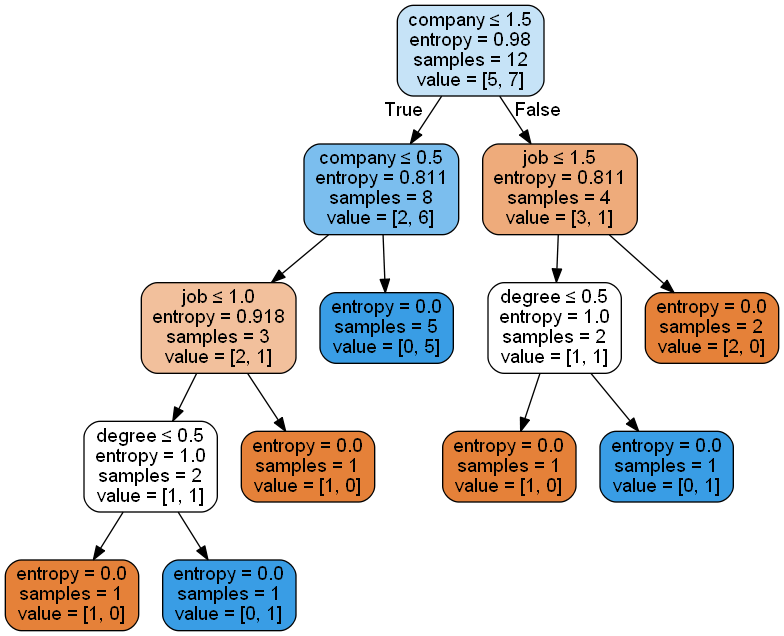

In [124]:


dot_tree = tree.export_graphviz(model, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)  

Image(graph.create_png())

Using the Model for Prediction

In [125]:
y_pred_train = model.predict(X_train)  
y_pred_train

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [126]:
y_pred_test = model.predict(X_test)  
y_pred_test

array([1, 1, 0, 0], dtype=int64)

In [127]:
y_test

3     1
13    1
7     0
2     1
Name: expectedsalary, dtype: int64

In [128]:
X_train

,company,job,degree
6,0,2,1
10,1,2,0
4,2,1,0
1,2,2,1
14,1,1,0
0,2,2,0
15,1,1,1
9,0,0,1
8,0,0,0
12,1,0,0


In [129]:
y_train

6     0
10    1
4     0
1     0
14    1
0     0
15    1
9     1
8     0
12    1
11    1
5     1
Name: expectedsalary, dtype: int64

 Model Evaluation using accuracy_score

In [130]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.75


In [132]:
model.score(X_train,y_train) #score is calculated based on training data

1.0

Confusion Matrix

In [133]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Actual Taken','Actual Not Taken']
confusion_matrix.columns = ['Predicted Taken','Predicted Not Taken']
print(confusion_matrix)

                  Predicted Taken  Predicted Not Taken
Actual Taken                    1                    0
Actual Not Taken                1                    2


that mean 1+2=3 correct precition and 1+0=1 wrong prediction

Now predict the value of 2nd row in data
compnay:google	
job:sales executive	
degree:masters

After LabelEncoding the value is
compnay:2	
job:2	
degree:1

In [42]:
y_test

3     1
13    1
7     0
2     1
Name: expectedsalary, dtype: int64

In [134]:
model.predict(X_train)

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [136]:
model.predict([[2,2,1]]) #predicted value is 0 which is equal to actual value

array([0], dtype=int64)

 Decision Tree with Gridsearch

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,100),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=4, refit='AUC')
grid_search.fit(X_train, y_train)

E:\AnacondaInstall\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 100), 'max_features': ['sqrt', 'log2', None]}],
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score='warn',
       scoring=None, verbose=0)

Using the model for prediction

In [145]:
y_pred_test1 = grid_search.predict(X_test)

Model Evaluation using accuracy_score

In [146]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data is: 0.75


In [147]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

confusion_matrix.index = ['Actual Taken','Actual Not Taken']
confusion_matrix.columns = ['Predicted Taken','Predicted Not Taken']
print(confusion_matrix)

                  Predicted Taken  Predicted Not Taken
Actual Taken                    1                    0
Actual Not Taken                1                    2


The result is same using the grid search also